<a href="https://colab.research.google.com/github/EliwaaH/Deep-Learning-Projects/blob/main/Cats%26Dogs_From_Scratch_With_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we will use Kaggel cats and dogs dataset and we will build a classifier using Tensorflow and Keras from scratch.

This is the first part of three parts project which contains


*   **Cats & Dogs classifier from scratch (This notebook)**
*   Cats & Dogs classifier using Feature Extraction method 

*   Cats & Dogs classifier using Fine Tuning method







In [ ]:
import numpy as np
import os
import random
import zipfile 
import shutil
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/content/catsVdogs.zip"

--2022-09-24 00:02:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.65.228.252, 2600:1413:a000:682::317f, 2600:1413:a000:6bb::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.65.228.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/content/catsVdogs.zip’

/content/catsVdogs. 100%[===================>] 786.67M   272MB/s    in 2.9s    

2022-09-24 00:02:05 (272 MB/s) - ‘/content/catsVdogs.zip’ saved [824887076/824887076]



In [ ]:
# Here, we are zipping our downloaded dataset and extract it in our working directory 

local_zip = "/content/catsVdogs.zip"
zip_file = zipfile.ZipFile(local_zip, 'r')
current_dir = os.getcwd()
zip_file.extractall(current_dir)
zip_file.close()

In [ ]:
source_path = '/content/PetImages'

source_path_cats = os.path.join(source_path, 'Cat')
source_path_dogs = os.path.join(source_path, 'Dog')

# Here, we are removing any file that doesn't has the file format jpg in our working files
!find /content/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

print(f'Found {len(os.listdir(source_path_cats))} images of cats')
print(f'Found {len(os.listdir(source_path_dogs))} images of dogs')

Found 12500 images of cats
Found 12500 images of dogs


So, After downloading our data and clean it we have to prepare our training and validation directories to copy cats and dogs images in it

In [ ]:
# Training and Validation Directories Preparation

def create_train_valid_dirs():
  
  cur_dir = os.getcwd()

  
  #Checking if the main directory is already exists or not, if exist so delete the whole directroy
  if os.path.exists(os.path.join(f'{cur_dir}/catsVdogs')):
    shutil.rmtree(os.path.join(f'{cur_dir}/catsVdogs'))

  #creating the main directory
  os.mkdir(os.path.join(cur_dir, 'catsVdogs'))


  #creatin the training directory
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs', 'training'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/training', 'cats'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/training', 'dogs'))
  
  #creating the validation directory
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs', 'validation'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/validation', 'cats'))
  os.mkdir(os.path.join(f'{cur_dir}/catsVdogs/validation', 'dogs'))

  pass

create_train_valid_dirs()

The next step is splitting our data into validation and training samples, so we will create a function that will do some steps on data before splitting

1.   Randomize our data by shuffling it by using (random.sample(list, len(list))
2.   Check if there's any image that doesn't have a size(undefined image)

1.   Splitting our data by a ratio that we will define





In [ ]:
def split_data(source_dir, training_dir, validation_dir, split_size):
  
  shuffled_data = random.sample(list(os.listdir(source_dir)), len(os.listdir(source_dir)))
  training_number = int(len(shuffled_data) * split_size)

  i = 0
  dir = training_dir

  for im in shuffled_data:
    image_source = os.path.join(source_dir, im)

    if i == training_number:
      dir = validation_dir
    
    i += 1

    if os.path.getsize(image_source) == 0:
      print(f'{im} is zero lentgh, so ignoring')

    else:
      copyfile(image_source, os.path.join(dir, im))


  pass

After creating our function we have to define our paths and check the number of images that will fly to our image generators which will be the input for our classifier.

In [ ]:
CAT_DIRECTORY = '/content/PetImages/Cat/'
DOG_DIRECTORY = '/content/PetImages/Dog/'

TRAINING_CAT_DIR = '/content/catsVdogs/training/cats/'
TRAINING_DOG_DIR = '/content/catsVdogs/training/dogs/'
VALIDATION_CAT_DIR = '/content/catsVdogs/validation/cats/'
VALIDATION_DOG_DIR = '/content/catsVdogs/validation/dogs/'


if len(os.listdir(TRAINING_CAT_DIR)) > 0:
  for file in os.scandir(TRAINING_CAT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOG_DIR)) > 0:
  for file in os.scandir(TRAINING_DOG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CAT_DIR)) > 0:
  for file in os.scandir(VALIDATION_CAT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOG_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOG_DIR):
    os.remove(file.path)

split_data(CAT_DIRECTORY, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, 0.9)
split_data(DOG_DIRECTORY, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, 0.9)

print(f"\n\nThere are {len(os.listdir(TRAINING_CAT_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOG_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CAT_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(VALIDATION_DOG_DIR))} images of dogs for testing")


666.jpg is zero lentgh, so ignoring
11702.jpg is zero lentgh, so ignoring


There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


Now, we are in the last part of preparing our data which is making the genrators that will be the classifier input.

Generators are very useful keras image API that can do a lot of operations to our data before going to the classifier like AUGMENTAION.

In [ ]:
def create_image_generators(TRAINING_DIR, VALIDATION_DIR):

  train_data = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_generator=train_data.flow_from_directory(
      directory = TRAINING_DIR,
      batch_size = 128, 
      class_mode='binary',
      target_size = (150, 150)
  )


  valid_data = ImageDataGenerator(rescale=1./255.)

  validation_generator = valid_data.flow_from_directory(
      directory = VALIDATION_DIR, 
      batch_size = 32, 
      class_mode='binary',
      target_size = (150, 150)
  )

  return train_generator, validation_generator

In [ ]:
TRAINING_DIR = '/content/catsVdogs/training/'
VALIDATION_DIR = '/content/catsVdogs/validation/'

train_generator, validation_generator = create_image_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


As we can see our Image generators successfuly defined two classes for every directory

Now we are going to create our model and build our DNN from scratch using tensorflow and keras

In [ ]:
def create_model():

  inputs = Input(shape=(150, 150, 3))
  x = Conv2D(16, (3, 3), activation='relu')(inputs)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = MaxPooling2D(2, 2)(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = MaxPooling2D(2, 2)(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(128, (3, 3), activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = MaxPooling2D(2, 2)(x)
  x = BatchNormalization()(x)
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(inputs = inputs, outputs =  x)
  
  return model

In [ ]:
model  = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 16)     64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 146, 146, 16)      0     

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), 
             loss = 'binary_crossentropy', 
             metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks = myCallback()
history = model.fit(
    train_generator,
    epochs = 100, 
    verbose = 1,
    validation_data=validation_generator,
    callbacks=[callbacks] 
)

Epoch 1/100
161/176 [==========================>...] - ETA: 14s - loss: 0.3646 - accuracy: 0.8364

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

176/176 [==============================] - 174s 988ms/step - loss: 0.3621 - accuracy: 0.8383 - val_loss: 0.3990 - val_accuracy: 0.8232
Epoch 2/100
176/176 [==============================] - 171s 972ms/step - loss: 0.3330 - accuracy: 0.8521 - val_loss: 0.3541 - val_accuracy: 0.8472
Epoch 3/100
176/176 [==============================] - 171s 971ms/step - loss: 0.3046 - accuracy: 0.8682 - val_loss: 0.6871 - val_accuracy: 0.7620
Epoch 4/100
176/176 [==============================] - 171s 971ms/step - loss: 0.2846 - accuracy: 0.8776 - val_loss: 0.8977 - val_accuracy: 0.6688
Epoch 5/100
176/176 [==============================] - 171s 973ms/step - loss: 0.2661 - accuracy: 0.8877 - val_loss: 0.5726 - val_accuracy: 0.7972
Epoch 6/100
176/176 [==============================] - 170s 965ms/step - loss: 0.2510 - accuracy: 0.8915 - val_loss: 0.2737 - val_accuracy: 0.8844
Epoch 7/100
176/176 [==============================] - 171s 972ms/step - loss: 0.2375 - accuracy: 0.8999 - val_loss: 0.4148 - val_

The Last step in our notebook is to visualize the training results so we can see how our training and validation accuracies like, This help us to know at which point our model is getting to overfit and where is the best training point that the model reached to it during training.

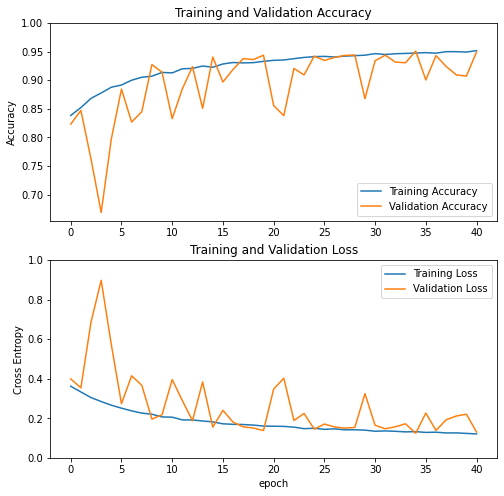

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
images = os.listdir(os.path.join("/content/test_images/"))

for i in images:
  path = "/content/test_images/" + i
  img = image.load_img(path, target_size= (150, 150))
  x = image.img_to_array(img)
  x /= 255.0
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  for n in classes:
    if n[0] > 0.5:
      print(f'the probability for image {i} is dog')
    else:
      print(f'the probability for image {i} is cat')

the probability for image cat1.jpg is cat
the probability for image cat18.jpg is cat
the probability for image dog1.jpg is dog
the probability for image cat16.jpg is cat
the probability for image cat19.jpg is cat
the probability for image cat12.jpg is cat
the probability for image cat7.jpg is cat
the probability for image cat9.jpg is cat
the probability for image cat15.jpg is cat
the probability for image cat3.jpg is cat
the probability for image cat20.jpg is cat
the probability for image cat6.jpg is cat
the probability for image cat2.jpg is cat
the probability for image dog5.jpg is dog
the probability for image dog3.jpg is dog
the probability for image dog2.jpg is dog
the probability for image dog4.jpg is dog
the probability for image cat8.jpg is cat
the probability for image cat4.jpg is cat
the probability for image cat14.jpg is cat
the probability for image cat17.jpg is cat
the probability for image cat13.jpg is cat
the probability for image cat11.jpg is cat
the probability for imag